In [24]:
import sys
sys.path.append('/home/meiri.yoav/biomed_proj/pyPPG')

In [25]:
from Prefiltering import*
from FiducialPoints import*
from Biomarkers2 import*
from Summary import*
from Statistics import*

import matplotlib.pyplot as plt
import numpy as np
import glob

In [26]:
annot_files = sorted(glob.glob("/home/meiri.yoav/biomed_proj/data/annotated/*"))
af_files = [f for f in annot_files if 'non' not in f]
non_af_files = [f for f in annot_files if 'non' in f]

In [27]:
#! REMEMBER TO EXCLUDE TPI, sample_idx, os
import pickle as pkl

def load_annotated(path):
    # example: path = '/data/home/meiri.yoav/biomed_proj/data/annotated/annot_af_001.pkl'
    with open(path, 'rb') as f:
        annot = pkl.load(f)
    hr = annot['hr']
    fiducials = annot['fiducials']
    str_num = annot['sample_num']
    fs = annot['fs']
    cond = annot['condition']
    osignal_data = annot['osignal_data']
    return cond, hr, fiducials, str_num, fs, osignal_data
    
# open /data/home/meiri.yoav/biomed_proj/data/annotated_AF/annot_AF_001.pkl
with open('/home/meiri.yoav/biomed_proj/data/annotated/annot_af_001.pkl', 'rb') as f:
    annot = pkl.load(f)

In [28]:
cond, hr, fiducials, str_num, fs, osignal_data = load_annotated('/home/meiri.yoav/biomed_proj/data/annotated/annot_af_001.pkl')

In [29]:
fiducials['pk'].dropna().values[:30]

<IntegerArray>
[  78,  165,  241,  345,  403,  480,  556,  645,  741,  825,  903, 1004, 1063,
 1150, 1253, 1308, 1398, 1468, 1541, 1613, 1701, 1765, 1846, 1938, 2025, 2108,
 2216, 2291, 2368, 2466]
Length: 30, dtype: Int64

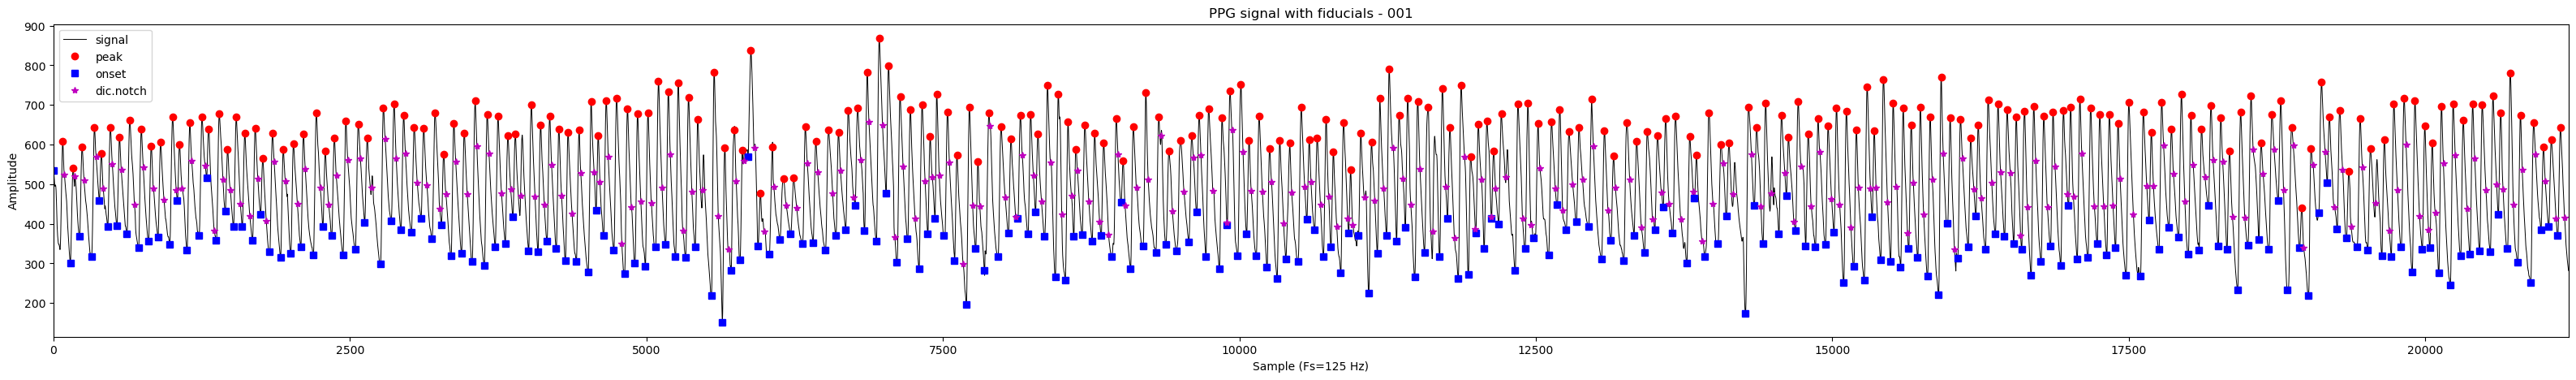

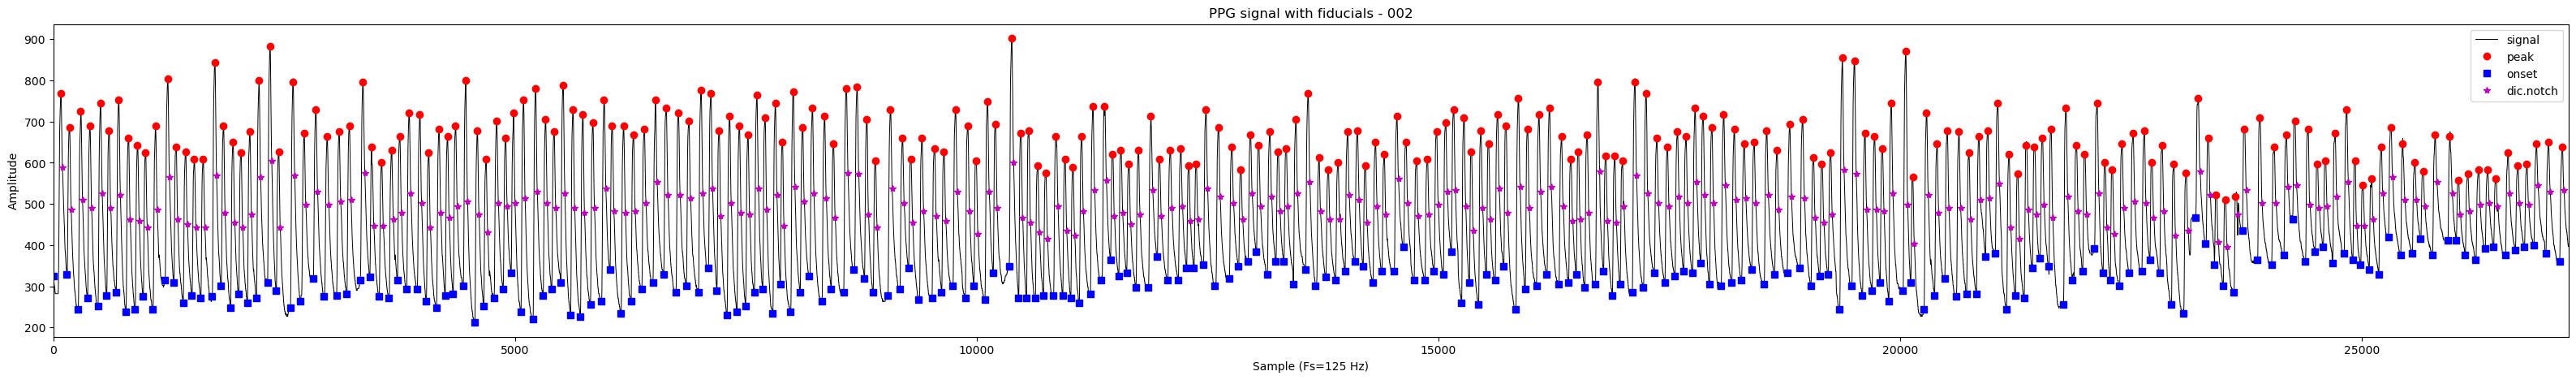

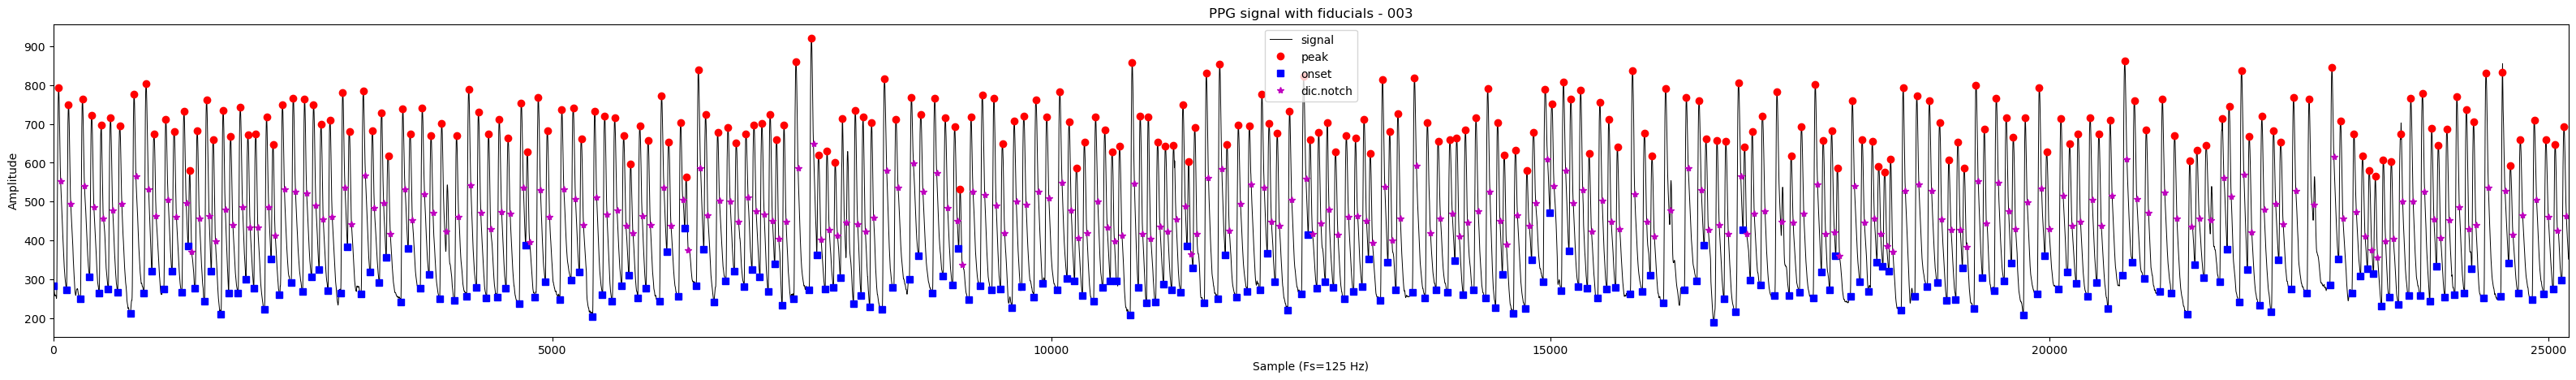

In [30]:
size_in_cycles = 250

def plot_annotated_signal(fiducials):
    plt.figure(figsize=(40,5))
    plt.plot(hr[:fiducials['os'].dropna().values.astype(int)[size_in_cycles]],'k',linewidth=0.7)
    plt.plot(fiducials['pk'].dropna().values[:size_in_cycles], hr[fiducials['pk'].dropna().values.astype(int)[:size_in_cycles]], 'ro')
    plt.plot(fiducials['os'].dropna().values[:size_in_cycles], hr[fiducials['os'].dropna().values.astype(int)[:size_in_cycles]], 'bs')
    plt.plot(fiducials['dn'].dropna().values[:size_in_cycles], hr[fiducials['dn'].dropna().values.astype(int)[:size_in_cycles]], 'm*')

    plt.xlim(right=fiducials['os'].dropna().values.astype(int)[size_in_cycles], left=0)  # adjust the right leaving left unchanged
    plt.title(f'PPG signal with fiducials - {str_num}')
    plt.legend(['signal', 'peak','onset','dic.notch'])
    plt.xlabel('Sample (Fs='+str(fs)+' Hz)')
    plt.ylabel('Amplitude')
    plt.show()

for f in af_files[:3]:
    cond, hr, fiducials, str_num, fs, osignal_data = load_annotated(f)
    plot_annotated_signal(fiducials)

In [31]:
annot['osignal_data'] # features for each cycle, containing the sample index, os, Tpi of each fiducial point

,Tpi,Tpp,Tsys,Tdia,Tsp,Tdp,deltaT,Tsw10,Tsw25,Tsw33,...,Tpw33,Tpw50,Tpw66,Tpw75,Tpw90,Asp,Aoff,AUCpi,sample_idx,os
0,1.128,0.696,0.728,0.400,0.616,0.728,0.112,0.096,0.088,0.080,...,0.416,0.336,0.224,0.160,0.072,172.429008,-149.386388,-1.877154,141,142
1,0.608,0.608,0.304,0.304,0.184,0.304,0.120,0.144,0.128,0.112,...,0.400,0.352,0.296,0.256,0.080,226.133830,48.399666,10.349580,217,218
2,0.824,0.832,0.320,0.504,0.184,0.320,0.136,0.136,0.120,0.104,...,0.504,0.376,0.240,0.176,0.096,232.747573,-44.824472,2.326580,320,321
3,0.520,0.464,0.312,0.208,0.192,0.312,0.120,0.144,0.120,0.112,...,0.320,0.240,0.168,0.128,0.072,309.347675,96.751737,8.843955,385,386
4,0.560,0.616,0.264,0.296,0.136,0.264,0.128,0.104,0.088,0.080,...,0.280,0.192,0.128,0.104,0.064,112.818888,-67.290288,5.942068,455,456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.736,0.640,0.376,0.360,0.224,0.376,0.152,0.176,0.144,0.128,...,0.248,0.184,0.144,0.112,0.072,495.697154,145.170741,9.999794,148841,148842
1732,0.528,0.664,0.248,0.280,0.128,0.248,0.120,0.104,0.088,0.088,...,0.344,0.288,0.256,0.232,0.096,109.657865,10.495864,10.010608,148907,148908
1733,0.824,0.696,0.448,0.376,0.264,0.448,0.184,0.216,0.144,0.128,...,0.304,0.224,0.176,0.160,0.104,139.540072,47.160745,9.997175,149010,149011
1734,0.496,0.736,0.352,0.144,0.136,0.352,0.216,0.096,0.080,0.072,...,0.240,0.208,0.168,0.136,0.072,81.423575,-59.161973,9.987521,149072,149073


In [32]:
X = annot['osignal_data'].drop(columns=['Tpi', 'sample_idx', 'os']) # pure features for each cycle

In [33]:
X

,Tpp,Tsys,Tdia,Tsp,Tdp,deltaT,Tsw10,Tsw25,Tsw33,Tsw50,...,Tpw10,Tpw25,Tpw33,Tpw50,Tpw66,Tpw75,Tpw90,Asp,Aoff,AUCpi
0,0.696,0.728,0.400,0.616,0.728,0.112,0.096,0.088,0.080,0.064,...,0.536,0.456,0.416,0.336,0.224,0.160,0.072,172.429008,-149.386388,-1.877154
1,0.608,0.304,0.304,0.184,0.304,0.120,0.144,0.128,0.112,0.096,...,0.504,0.440,0.400,0.352,0.296,0.256,0.080,226.133830,48.399666,10.349580
2,0.832,0.320,0.504,0.184,0.320,0.136,0.136,0.120,0.104,0.088,...,0.640,0.552,0.504,0.376,0.240,0.176,0.096,232.747573,-44.824472,2.326580
3,0.464,0.312,0.208,0.192,0.312,0.120,0.144,0.120,0.112,0.088,...,0.424,0.352,0.320,0.240,0.168,0.128,0.072,309.347675,96.751737,8.843955
4,0.616,0.264,0.296,0.136,0.264,0.128,0.104,0.088,0.080,0.064,...,0.472,0.328,0.280,0.192,0.128,0.104,0.064,112.818888,-67.290288,5.942068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.640,0.376,0.360,0.224,0.376,0.152,0.176,0.144,0.128,0.096,...,0.504,0.408,0.248,0.184,0.144,0.112,0.072,495.697154,145.170741,9.999794
1732,0.664,0.248,0.280,0.128,0.248,0.120,0.104,0.088,0.088,0.072,...,0.464,0.416,0.344,0.288,0.256,0.232,0.096,109.657865,10.495864,10.010608
1733,0.696,0.448,0.376,0.264,0.448,0.184,0.216,0.144,0.128,0.104,...,0.656,0.536,0.304,0.224,0.176,0.160,0.104,139.540072,47.160745,9.997175
1734,0.736,0.352,0.144,0.136,0.352,0.216,0.096,0.080,0.072,0.064,...,0.376,0.264,0.240,0.208,0.168,0.136,0.072,81.423575,-59.161973,9.987521


In [34]:
B = 1000
series_size = 10
def sample_series(X, B, series_size):
    n = X.shape[0]
    idx = np.random.randint(0, n-series_size, B)
    X_sampled = np.zeros((B, series_size, X.shape[1]))
    for i in range(B):
        X_sampled[i,:,:] = X.iloc[idx[i]:idx[i]+series_size,:]
    return X_sampled

data = sample_series(X, B, series_size)

In [35]:
print(data.shape)

(1000, 10, 30)
